# Customer Analysis For Retail

#### BUSINESS PROBLEM:

A Retail store is required to analyze the day-to-day transactions and keep a track of it's customers spread across various locations along with their purchases and returns across various categories.
In order to do it they should create a report and display the below calculated metrics, reports and inferences.

## (1) Loading data & preprocessing

In [1]:
# Importing packegaes
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
from datetime import timedelta
import datetime as dt
import time
import os

In [2]:
# Set the graphs to show inside the jupyter notebook
%matplotlib inline

# Set seabor graphs style
sns.set(style="ticks")

In [3]:
# Uploading datasets : "customers", "product categories info", "transaction" from the file
customers = pd.read_csv("Customer.csv")
product_categories_info= pd.read_csv("prod_cat_info.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Checking for the tables shape
print("customers shape:", customers.shape)
print("product categories shape:", product_categories_info.shape)
print("transactions shape:", transactions.shape)

customers shape: (5647, 4)
product categories shape: (23, 4)
transactions shape: (23053, 10)


In [5]:
# let's have a quick peek on our data
print(customers.head(), "\n\n")

print(product_categories_info.head(), "\n\n")

print(transactions.head())

   customer_Id         DOB Gender  city_code
0       268408  02-01-1970      M        4.0
1       269696  07-01-1970      F        8.0
2       268159  08-01-1970      F        8.0
3       270181  10-01-1970      F        2.0
4       268073  11-01-1970      M        1.0 


   prod_cat_code  prod_cat  prod_sub_cat_code prod_subcat
0              1  Clothing                  4        Mens
1              1  Clothing                  1       Women
2              1  Clothing                  3        Kids
3              2  Footwear                  1        Mens
4              2  Footwear                  3       Women 


   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11


As we can notice from the above pick into the data that the "prod_subcat_code" col in the transaction table and the "prod_sub_cat_code" col in the product categories info table. Let's renaming the column "prod_sub_cat_code" to "prod_subcat_code" so that we will be able to merged easily transaction and product categories info data sets.

In [6]:
product_categories_info.rename(columns = {"prod_sub_cat_code":"prod_subcat_code"},inplace = True)

In order to make the data analysis simple and more accurate we will merge the datasets customers, product categories information and transactions as df_final. While ensuring to keep all customers who have done transactions with us and select the join type accordingly.

In [7]:
# First, we would merge datasets "transaction" and "product categories info" using left join and assigning it to variable "transaction_cat".
transactions_cat= pd.merge(left = transactions,
        right = product_categories_info,
        on = ["prod_cat_code","prod_subcat_code"],
        how = "left",
        )

print(transactions_cat.shape)

(23053, 12)


In [8]:
# Peeking to the merged dataset
transactions_cat.head()
#print(type(transactions_cat))

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [9]:
# In the next step we would like to merge datasets "transactions_cat" and "customers" and assigning it to a final variable called "df_final"
df_final = pd.merge(left = transactions_cat,
                         right = customers,
                         left_on = "cust_id",
                         right_on = "customer_Id",
                         how = "left")
print(df_final.shape)

(23053, 16)


In [10]:
# Peeking to the merged and final dataset
df_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


Notice! The amount of rows of both "df_final" and "transaction_cat" are same, it means that all transactions done are presented in customers_final and we can now focus on this dataset only for our analysis.

In [11]:
df_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [12]:
# Converting "DOB" dtype from object to dates.
df_final["DOB"] = pd.to_datetime(df_final["DOB"],format = "%d-%m-%Y")
df_final["tran_date"] = pd.to_datetime(df_final["tran_date"])

In [13]:
# Adding new features that will present the date of transaction in a different way.
df_final.insert(loc=3, column='year', value= df_final.tran_date.dt.year)
df_final.insert(loc=4, column='month', value= df_final.tran_date.dt.month)
df_final.insert(loc=5, column='day', value= df_final.tran_date.dt.day_name())

df_final.head()

,transaction_id,cust_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,2014,2,Friday,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,2014,2,Thursday,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,2014,2,Monday,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,2014,2,Monday,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,2014,2,Sunday,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [14]:
# Let's check for any empty values.
df_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
year                0
month               0
day                 0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [15]:
# Let's fill in missing values in Gender and city_code features due to the small amount in compare to all the observations.
df_final['Gender'].fillna(df_final['Gender'].value_counts().idxmax(), inplace = True)
df_final['city_code'].fillna(df_final['city_code'].value_counts().idxmax(), inplace = True)

In [16]:
# Let's check for any empty values.
df_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
year                0
month               0
day                 0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              0
city_code           0
dtype: int64

In [17]:
# Dropping duplicates
df_final.drop_duplicates(inplace=True)

In [18]:
print("There are :", df_final.duplicated().sum(), "duplicate rows.")
#print(df_final.shape)
print("The final dataset includes 19 features and 23,040 observations.")

There are : 0 duplicate rows.
The final dataset includes 19 features and 23,040 observations.


## (2) Data analysis - df_final

### Preparing a summary report for the merged data set

In [19]:
# Using describe help us to see count, mean, std, min, 25%, 50%, 75%, max for continuous variables presentED in the data.
df_final.describe()

,transaction_id,cust_id,year,month,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000
mean,5.006955e+10,271021.880252,2012.112717,6.502865,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.482552
std,2.898062e+10,2431.573668,0.893871,3.475034,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.862967
min,3.268991e+06,266783.000000,2011.000000,1.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,2011.000000,3.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,2012.000000,7.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,2013.000000,10.000000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,2014.000000,12.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [20]:
# We will describe Min as 0 , Q1 as 0.25 , Q2 as 0.5 , Median as 0.5 , Q3 as 0.75 , Max as 1 while using quantile function.

quant = df_final.quantile([0, 0.25, 0.5, 0.75, 1])
Min = quant.loc[0]
Q1 = quant.loc[0.25]
Q3 = quant.loc[0.75]
Median = quant.loc[0.5]
Max = quant.loc[1]

##### Histograms for continuous variables

In [21]:
# Creating a dataframe that include only the continous variables
continuos_variable = df_final.loc[:,["prod_subcat_code","prod_cat_code","Qty","Rate","Tax","total_amt"]]

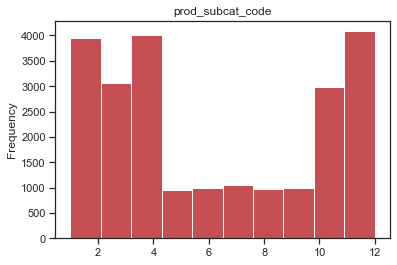

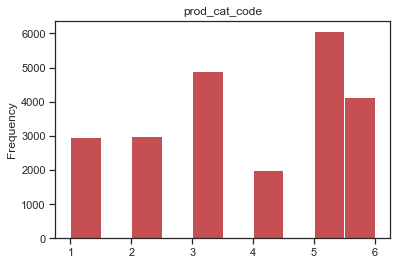

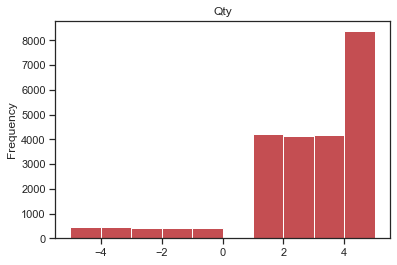

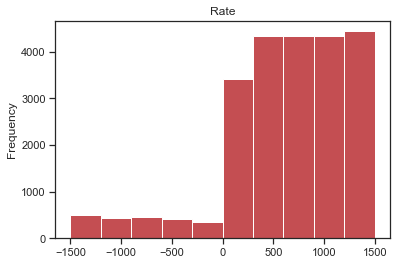

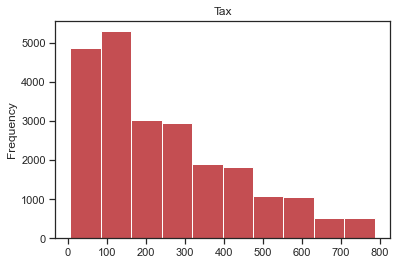

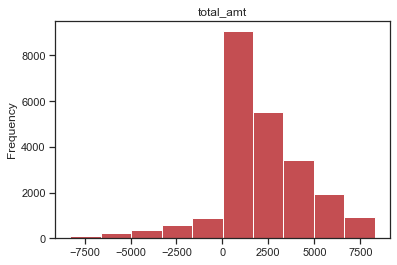

In [22]:
# Plotting histogram for those variables 
for variable in continuos_variable.columns:
    continuos_variable[variable].plot(kind="hist", color= 'r')
    plt.title(variable)
    plt.show()

##### Now we would like to create bar chart for Categorical Variables

In [23]:
# Define all categirical variables under the same group name (store_type, prod_cat, prod_subcat and gender)
categorical_variables = df_final.loc[:,df_final.dtypes == "object"]
categorical_variables

,day,Store_type,prod_cat,prod_subcat,Gender
0,Friday,e-Shop,Clothing,Women,M
1,Thursday,e-Shop,Electronics,Computers,F
2,Monday,TeleShop,Books,DIY,M
3,Monday,e-Shop,Home and kitchen,Bath,M
4,Sunday,TeleShop,Books,DIY,M
...,...,...,...,...,...
23048,Tuesday,e-Shop,Books,Academic,M
23049,Tuesday,e-Shop,Clothing,Mens,M
23050,Tuesday,MBR,Home and kitchen,Furnishing,M
23051,Tuesday,TeleShop,Books,Children,M


#### A. Who Makes The Majority Of The Orders? Women or men?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


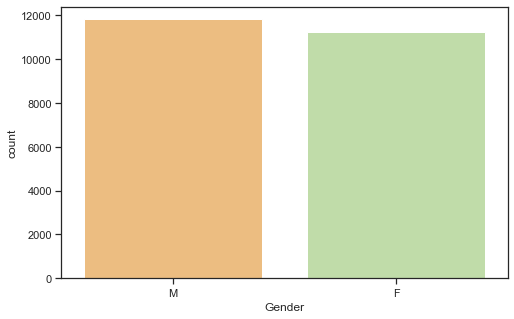

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(categorical_variables["Gender"], palette= "Spectral")
plt.show()

#### B. What Is the Store Type Where Most Orders Are Placed? And Which Of Product Category Is The Most Popular?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


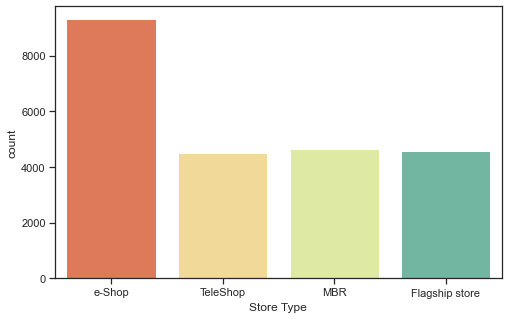

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(categorical_variables["Store_type"], palette= "Spectral")
plt.xlabel("Store Type")
plt.show()

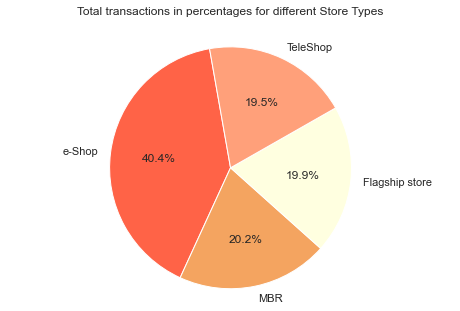

In [26]:
plt.figure(figsize=(8, 5))
sizes = df_final['Store_type'].value_counts().values
labels = df_final['Store_type'].value_counts().index
colors = ['tomato', 'sandybrown', 'lightyellow', 'lightsalmon'] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100 ,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total transactions in percentages for different Store Types\n")
plt.show()

We can see that almost 60% of the transactions are for Teleshops and e-shop, its indicate בhange in the why people think in the world of consumption and the transition from physical consumption in stores to online consumption.
We can see that total amount of transactions for E-shop is approximately twice as compared to the other store types.
Books have the highest number of transactions and the second one is electronics , the lowest is bags.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


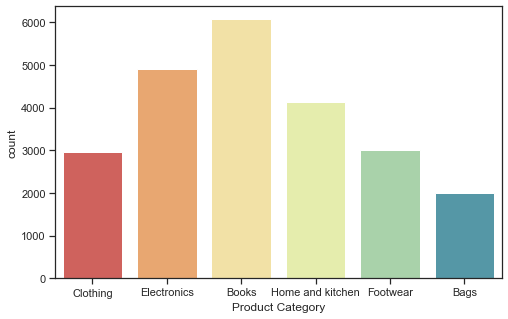

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(categorical_variables["prod_cat"], palette= "Spectral")
plt.xlabel("Product Category")
plt.show()


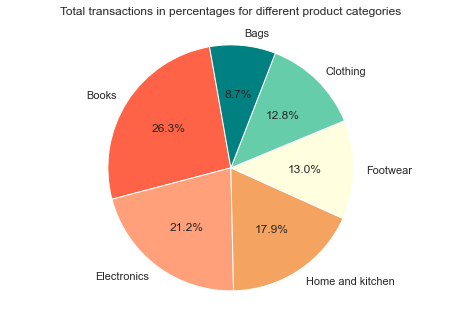

In [28]:
plt.figure(figsize=(8, 5))
labels = df_final['prod_cat'].value_counts().index
sizes = df_final['prod_cat'].value_counts().values
colors = ['tomato', 'lightsalmon', 'sandybrown', 'lightyellow', 'mediumaquamarine', 'teal']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=100 ,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total transactions in percentages for different product categories\n")
plt.show()


#### C. What Is the Sub-category In Which More Purchases Are Made? And What Is The Most Profitable Category?

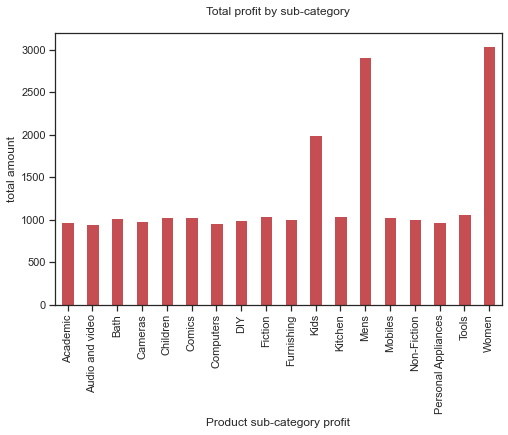

In [29]:
prod_subcat = categorical_variables.groupby("prod_subcat")["prod_subcat"].count()
prod_subcat

plt.figure(figsize = (8,5))
prod_subcat.plot(kind = "bar", color="r")
plt.xlabel("Product sub-category profit")
plt.ylabel("total amount")
plt.title("Total profit by sub-category\n")
plt.show()


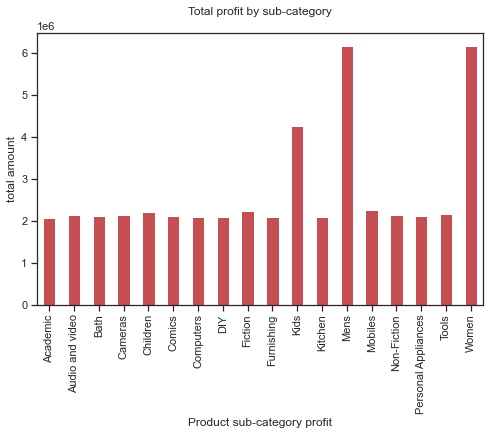

In [30]:
cat_tamt = df_final.groupby("prod_subcat")["total_amt"].sum()
cat_tamt

plt.figure(figsize = (8,5))
cat_tamt.plot(kind = "bar", color="r")
plt.xlabel("Product sub-category profit")
plt.ylabel("total amount")
plt.title("Total profit by sub-category\n")
plt.show()


#### D. In Which City Are The Majority Of Orders made?

<AxesSubplot:xlabel='city_code', ylabel='count'>

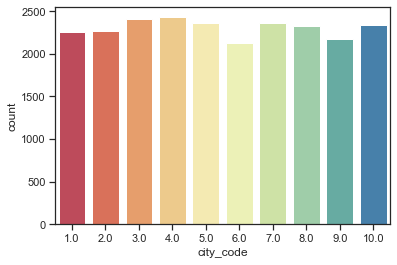

In [31]:
# Distribution of the city code feature.
sns.countplot(x="city_code", data=df_final, palette= "Spectral")

#### E. What Is The Most Profitable Category?

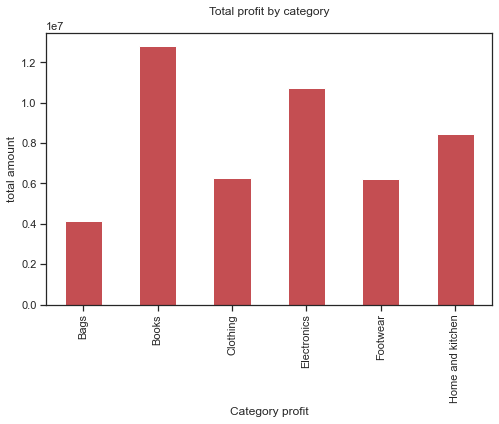

In [32]:
cat_tamt = df_final.groupby("prod_cat")["total_amt"].sum()
cat_tamt

plt.figure(figsize = (8,5))
cat_tamt.plot(kind = "bar", color="r")
plt.xlabel("Category profit")
plt.ylabel("total amount")
plt.title("Total profit by category\n")
plt.show()

#### F. What Is The Most Profitable Year?

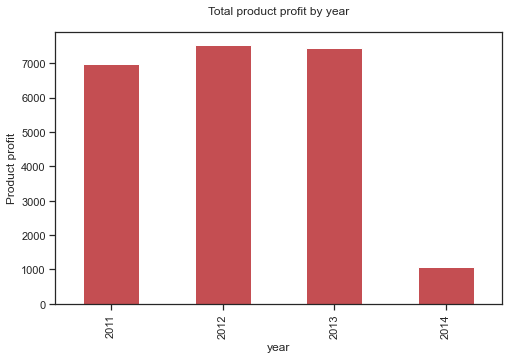

In [33]:
year_tamt = df_final.groupby(["year"])["total_amt"].count()
year_tamt

plt.figure(figsize = (8,5))
year_tamt.plot(kind = "bar", color="r")
plt.xlabel("year")
plt.ylabel("Product profit")
plt.title("Total product profit by year\n")
plt.show()



From the data analysis of "df_final" we can learn diifferent kinds of things about our data.

The majority of the orders are made by males.

The most orders are placed in e-shops, moreover, the product category that is most popular is books.

The sub-category in which more purchases are made is the woman category, but the man and woman categories are the most profitable.

Most of the orders are made in city code number 4 and if we will look at the most profitable category we can notice that books is on the top - same as the most popular one by amount of orders.

From the chart we can see that 2012 was the most profitable year but 2013 is very closed to 2012.



#### It is very important to pay attention and notice that the data also contains observations for canceled purchases (= returned orders), therefore the observation of return orders and the observation of the purchases must also be analyzed separately.

In [34]:
# In order to analyze the data this way we will separate the data to "r_df_final" for returned orders and "s_df_final" for the successful purchases due to the QTY variable.
r_df_final = df_final[df_final['Qty'] <= -1]
s_df_final = df_final[df_final['Qty'] >= 0]

## (3) Data analysis - dataset of returned orders

#### A. Returned Orders By Year

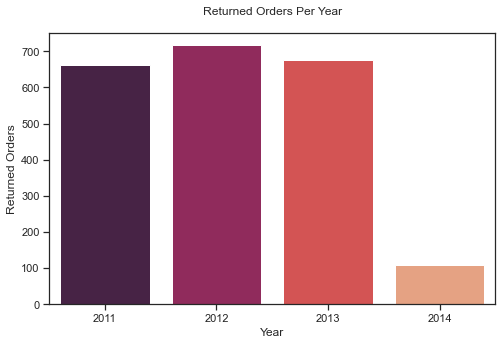

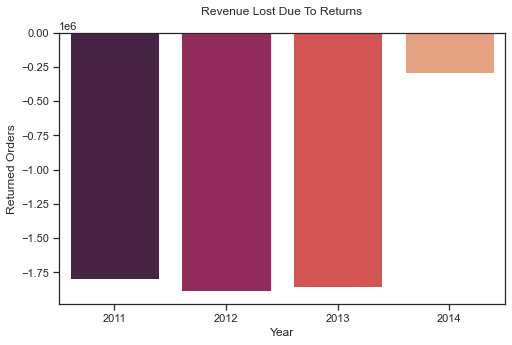

In [35]:
order_year_loss = r_df_final.groupby(by=['year'], as_index = False)['Qty'].count()

plt.figure(figsize=(8,5))
sns.barplot(x = "year", y = 'Qty', data = order_year_loss,  palette= "rocket")
plt.xlabel('Year')
plt.ylabel('Returned Orders')
plt.title('Returned Orders Per Year\n')
plt.show()

# Chart that shows revenue loss
sales_loss = r_df_final.groupby(by=['year'], as_index = False)['total_amt'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x = "year", y = 'total_amt', data = sales_loss,  palette = 'rocket')
plt.xlabel('Year')
plt.ylabel('Returned Orders')
plt.title('Revenue Lost Due To Returns\n')
plt.show()

#### B. Returned Orders By City

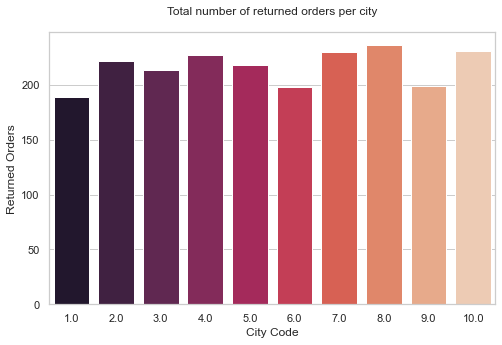

In [36]:
city_loss = r_df_final.groupby(by= ['city_code'], as_index = False)['Qty'].count()

plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x = "city_code", y = 'Qty', data = city_loss,  palette= "rocket")
plt.xlabel('City Code')
plt.ylabel('Returned Orders')
plt.title('Total number of returned orders per city\n')
plt.show()

#### C. Returned Orders Per Store Category

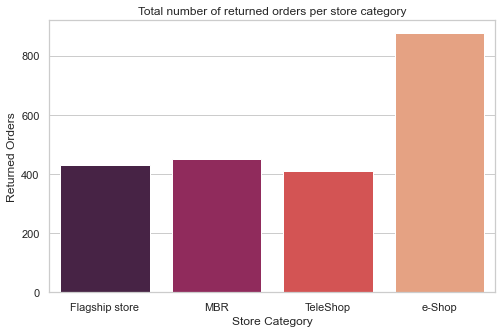

In [37]:
orders_loss = r_df_final.groupby(by=['Store_type'], as_index = False)['Qty'].count()

plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x = "Store_type", y = 'Qty', data = orders_loss,  palette= "rocket")
plt.xlabel('Store Category')
plt.ylabel('Returned Orders')
plt.title('Total number of returned orders per store category')
plt.show()

#### D. Returned Orders Per Product Category

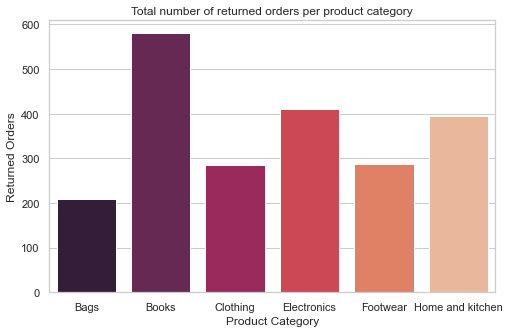

In [38]:
category_loss = r_df_final.groupby(by=['prod_cat'], as_index = False)['Qty'].count()

plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x = "prod_cat", y = 'Qty', data = category_loss,  palette= "rocket")
plt.xlabel('Product Category')
plt.ylabel('Returned Orders')
plt.title('Total number of returned orders per product category')
plt.show()

From the data analysis of the returned orders we can learn that the majority of product returns were recorded in 2012 dou to that fact the revenue lost in that year was the biggest.

The majority of returned orders acuured in city code number 8.

The e-Shop category was discovored as the highest whilw looking at the product returns per store, moreover, the most of product returns were from books category.


## (4) Data analysis - dataset of successful purchases

#### A. Total Orders Per Year

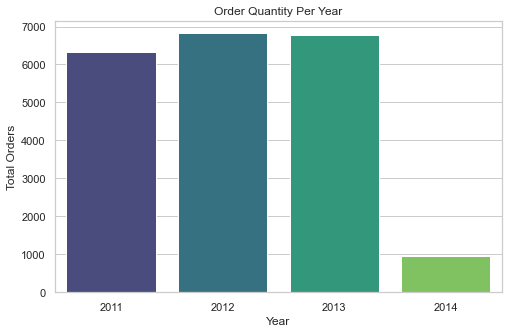

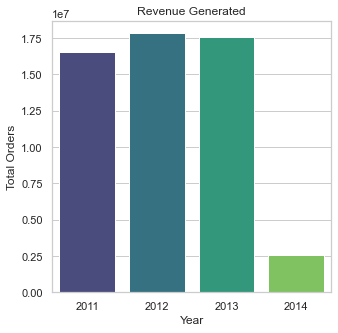

In [39]:
order_year = s_df_final.groupby(by=['year'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,5))
sns.barplot(x = "year", y = 'Qty', data = order_year,  palette= "viridis")
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Order Quantity Per Year')
plt.show()

sales = s_df_final.groupby(by=['year'], as_index = False)['total_amt'].sum()
plt.figure(figsize=(5,5))
sns.barplot(x = "year", y = 'total_amt', data = sales,  palette= "viridis")
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Revenue Generated')
plt.show()

#### B. Total Successful Orders Per City

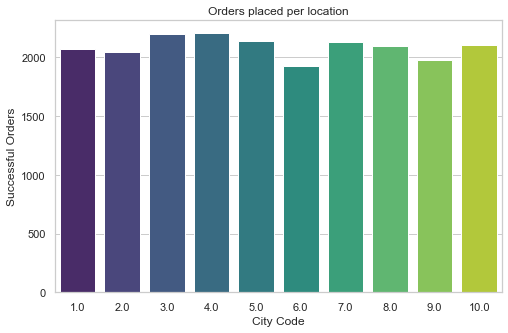

In [40]:
location = s_df_final.groupby(by= ['city_code'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.barplot(x = "city_code", y = 'Qty', data = location,  palette= "viridis")
plt.xlabel('City Code')
plt.ylabel('Successful Orders')
plt.title('Orders placed per location')
plt.show()

#### C. Total Orders Per Store Category

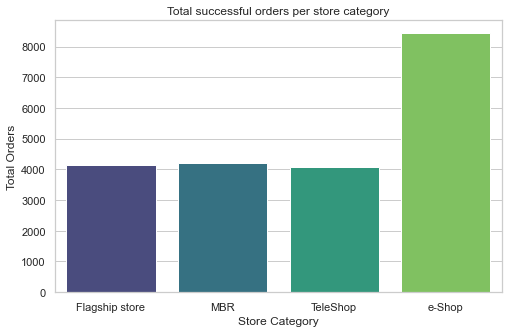

In [41]:
orders = s_df_final.groupby(by=['Store_type'], as_index = False)['Qty'].count()
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x = "Store_type", y = 'Qty', data = orders,  palette= "viridis")
plt.xlabel('Store Category')
plt.ylabel('Total Orders')
plt.title('Total successful orders per store category')
plt.show()

#### D. Total Orders Per Product Category And Revenue From Each One  

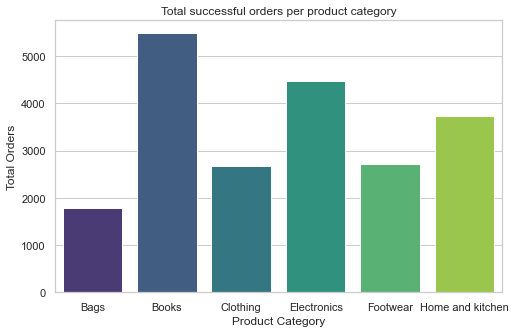

In [42]:
# Total orders by product categories
plt.figure(figsize=(8, 5))
category = s_df_final.groupby(by=['prod_cat'], as_index = False)['Qty'].count()
sns.set_style('whitegrid')
sns.barplot(x = "prod_cat", y = 'Qty', data = category,  palette= "viridis")
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.title('Total successful orders per product category')
plt.show()

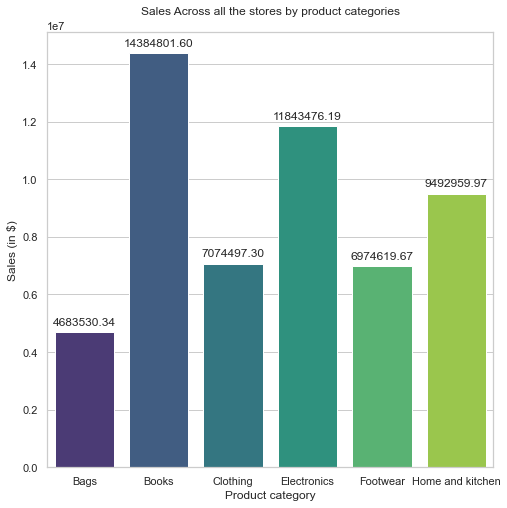

In [43]:
# Revenue plot                               
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
category_value=s_df_final.groupby(['prod_cat']).sum()['total_amt'].reset_index()
barplot=sns.barplot(x='prod_cat',y='total_amt',data=category_value, palette='viridis')
plt.title('Sales Across all the stores by product categories\n')
plt.xlabel('Product category')
plt.ylabel("Sales (in $)")

for p in barplot.patches:
  barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

#### E. Purchase By Gender

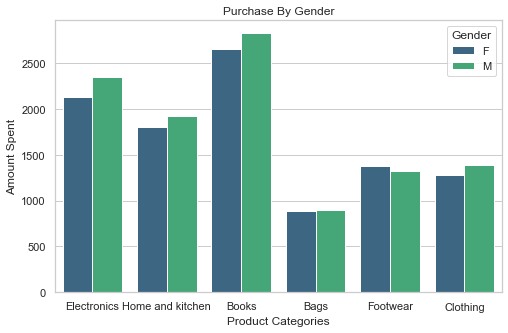

In [44]:
# Pivot chart representation
product_by_gender = s_df_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_by_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'prod_cat', hue = "Gender", data = s_df_final, palette= "viridis")
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.title('Purchase By Gender')
plt.show()

#### F. Revenue Per Category

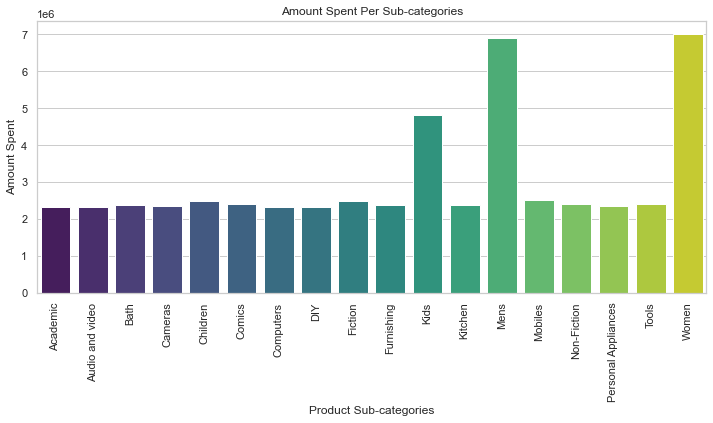

In [45]:
subcategory = s_df_final.groupby(by=['prod_subcat'], as_index = False)['total_amt'].sum()
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.barplot(y = "total_amt", x = 'prod_subcat', data = subcategory, palette= "viridis")
plt.ylabel('Amount Spent')
plt.xticks(rotation='vertical')
plt.xlabel('Product Sub-categories')
plt.title('Amount Spent Per Sub-categories')
plt.show()

#### G. Purchase By Age And Category

In [46]:
# In order to analyze data based on customer age, a new age column is created
now = pd.Timestamp('now')
s_df_final['DOB'] = pd.to_datetime(s_df_final['DOB'], errors = 'coerce') 
s_df_final['DOB'] = s_df_final['DOB'].where(s_df_final['DOB'] < now, s_df_final['DOB'] -  np.timedelta64(100, 'Y'))   
s_df_final['AGE'] = (now - s_df_final['DOB']).astype('<m8[Y]').round()

# Checking for max and min age
max_age = s_df_final['AGE'].max()
min_age = s_df_final['AGE'].min()

print(max_age)
print(min_age)

51.0
28.0


<ipython-input-46-426cf9f480e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df_final['DOB'] = pd.to_datetime(s_df_final['DOB'], errors = 'coerce')
<ipython-input-46-426cf9f480e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df_final['DOB'] = s_df_final['DOB'].where(s_df_final['DOB'] < now, s_df_final['DOB'] -  np.timedelta64(100, 'Y'))
<ipython-input-46-426cf9f480e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [47]:
# Using cut() method to bin age values into discrete intervals
s_df_final['age_category'] = pd.cut(x = s_df_final['AGE'], bins = [24, 30, 39, 49, 59], labels=['24-29','30-39','40-49','50- 59'], include_lowest=True)

<ipython-input-47-234b0d2b4e65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df_final['age_category'] = pd.cut(x = s_df_final['AGE'], bins = [24, 30, 39, 49, 59], labels=['24-29','30-39','40-49','50- 59'], include_lowest=True)


In [48]:
# Printing amount of people in each age category
s_df_final['age_category'].value_counts()

40-49     9230
30-39     8223
24-29     2513
50- 59     910
Name: age_category, dtype: int64

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
age_category,,,,,,
24-29,563181.0,1747377.0,920625.0,1340436.0,867885.0,1138875.0
30-39,1807207.0,5575900.0,2857604.0,4745474.0,2693110.0,3666502.0
40-49,2110301.0,6416023.0,3008526.0,5197612.0,3104611.0,4325571.0
50- 59,202842.0,645501.0,287742.0,559954.0,309013.0,362012.0


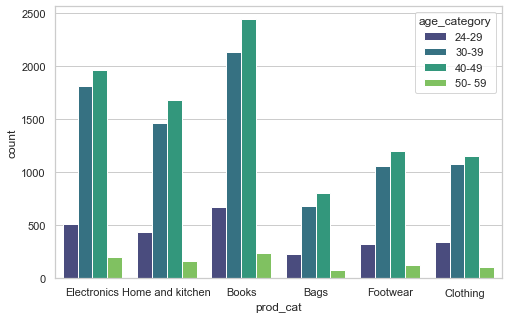

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'prod_cat', hue = 'age_category', data = s_df_final, palette= "viridis")

# Pivot chart representation
spend_per_category = s_df_final.groupby(['age_category','prod_cat'])['total_amt'].sum().reset_index()
spend_per_category.pivot(index = "age_category", columns = "prod_cat", values = 'total_amt').round(0)

#### H. Quantity Sold By Month

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
month,,,,,,
1,442,1447,762,1225,708,960
2,455,1404,560,1028,610,990
3,493,1416,729,1266,590,927
4,428,1359,569,1039,700,892
5,452,1403,609,1062,659,852
6,444,1290,654,1129,607,882
7,464,1320,617,1121,751,847
8,434,1377,660,1060,718,912
9,453,1417,711,1101,761,992


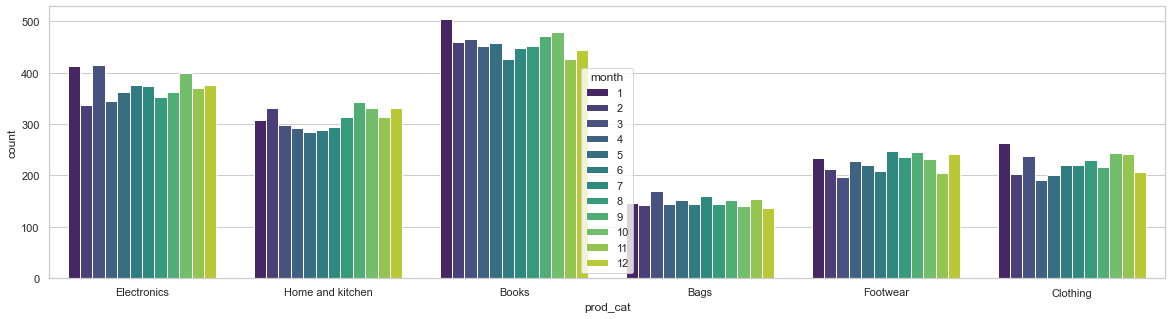

In [50]:
# Presenting category sales by month 
plt.figure(figsize=(20,5))
sns.countplot(x = 'prod_cat', hue = 'month', data = s_df_final, palette= "viridis")

# Pivot chart representation
spend_per_category = s_df_final.groupby(['month','prod_cat'])['Qty'].sum().reset_index()
spend_per_category.pivot(index = "month", values = 'Qty', columns = "prod_cat").round(0)

In [51]:
print('Value counts of quantity sold by month:')
s_df_final['month'].value_counts()

Value counts of quantity sold by month:


1     1869
10    1828
9     1789
3     1785
7     1746
12    1737
8     1729
11    1710
2     1687
5     1677
6     1666
4     1653
Name: month, dtype: int64

From the data analysis of the successful orders we can learn that the highest sales occured in the years 2012 and 2013, moreover, the most successful sales occured in 2012 and 2013 therefore these years showed the highest revenue.


The city code with the most successful orders is city code number 4.

The most purchases were made through the e-shop and while looking at total orders per product category we can see that books, electronics and home & kitchen were the most purchased product categories.

Purchases by men accounted for the highest percentage across all product categories except bags and footwear.

By category revenue we can learn that products in the women, mens and kids categories sold better than other categories.

Customers aged between 40-50 purchased the most products and 24-30 customers purchased the least even though it seems like 51-59 customers purchased the least - we cannot rely on this information sue to the fact that our data contains customers until the age of 51.

January is the most profit month in compare to others, October is right after him.  


### (5) RFM Score Calculation

RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (R: days since last purchase), how often they purchase (F: total number of purchases) and how much the customer spends (M total money this customer spent).

So when is comes to find out who is our best customers we will use FRM matrix principal.

In [52]:
# In order to make the RFM score calculation we will define rfmTable which include only successful purchases
df_final['tran_date'].min()
df_final['tran_date'].max()

NOW = dt.datetime(2014,12,3)

rfmTable = s_df_final.groupby('customer_Id').agg({'tran_date': lambda x: (NOW - x.max()).days, 'transaction_id': lambda x: len(x), 'total_amt': lambda x: x.sum()})

rfmTable['tran_date'] = rfmTable['tran_date'].astype(int)

rfmTable.rename(columns={'tran_date': 'recency', # days since last purchase 
                         'transaction_id': 'frequency', # total number of purchases
                         'total_amt': 'monetary_value'}, inplace=True) # total money this customer spent 

rfmTable.head()

,recency,frequency,monetary_value
customer_Id,,,
266783,457,4,8952.710
266784,815,3,5694.065
266785,658,7,28442.700
266788,366,4,6092.970
266794,1,11,28117.830


In [53]:
sort_by_monetary_value = rfmTable.sort_values('monetary_value', ascending=False)


print("Customers with the highest purchases: \n\n", sort_by_monetary_value.head(n=10))

Customers with the highest purchases: 

              recency  frequency  monetary_value
customer_Id                                    
271834           413         10       44967.975
270831           310         10       40280.565
267419           491          8       38389.910
273140           123          9       35861.670
273481           362         10       35020.765
272354           488         10       33954.440
274948            63         10       33569.900
272416           626          9       33558.850
274306           320          8       33508.020
275252           344         10       33506.915


In [54]:
# Showing rows for the most valuable customer which actually shows us some orders that this customer has made.
most_valued_customer = s_df_final.loc[s_df_final['customer_Id'] == 271834]

num_tran = most_valued_customer['transaction_id'].count()
first_tran_date = most_valued_customer['tran_date'].min()
last_tran_date = most_valued_customer['tran_date'].max()

print(type(last_tran_date))
print("The number of transactions :", num_tran)
print("The earliest transaction date is :" ,first_tran_date)
print("The lastest transaction date is :" ,last_tran_date, "\n")

most_valued_customer.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
The number of transactions : 10
The earliest transaction date is : 2011-02-22 00:00:00
The lastest transaction date is : 2013-10-16 00:00:00 



,transaction_id,cust_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,...,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,age_category
2645,93342173587,271834,2013-10-16,2013,10,Wednesday,12,6,5,1073,...,5928.325,Flagship store,Home and kitchen,Tools,271834,1980-05-12,M,9.0,40.0,40-49
2961,18340603689,271834,2013-09-30,2013,9,Monday,10,6,1,1073,...,1185.665,Flagship store,Home and kitchen,Kitchen,271834,1980-05-12,M,9.0,40.0,40-49
6727,87754053788,271834,2013-03-30,2013,3,Saturday,1,1,4,741,...,3275.220,TeleShop,Clothing,Women,271834,1980-05-12,M,9.0,40.0,40-49
9751,34440299625,271834,2012-03-11,2012,3,Sunday,4,3,2,532,...,1175.720,Flagship store,Electronics,Mobiles,271834,1980-05-12,M,9.0,40.0,40-49
11470,2139956715,271834,2012-08-14,2012,8,Tuesday,9,3,4,1457,...,6439.940,TeleShop,Electronics,Cameras,271834,1980-05-12,M,9.0,40.0,40-49


In [55]:
print(s_df_final["tran_date"].min())
print(s_df_final["tran_date"].max())

2011-01-02 00:00:00
2014-12-02 00:00:00


### Information due to the EDA (=exploratory data analysis) 
##### Transactions Period is from January 2nd 2011 to December 2nd 2014.

More men were recorded as customers than women,the city with the highest number of customers was city 4 - the highest revenue was recorded in cities 4 and 3 and the lowest was in city 6.
Highest sales was recorded in the years 2012 and 2013, there was a sharp decline in sales from 2013 to 2014, It's not clearfrom the data why this occurred.

Product categories: Books, Electronics and Home & Kitchen accounted for the most ordered and most returned, notice that the difference between successful sales and returns is quite wide.
Purchases were largely made online, with the e-Shop which also ccounts for the most returned orders.

Considering subcategories - women, mens and kids products sold more than the rest (womans at the most).
Customers aged between 40 - 50 accounted for the most sales.
Across the period time include in the dataset the most sales were recorded in the month January.
Customer with ID 271834 spent the most $44,967, purchasing only 10 items. He is a 40 year old resident of city 9. His purchases spanned across 2011 and 2013.